### Compare with original Merge Sort
Compare its performance against the above hybrid algorithm in terms of `number of key comparison` and `CPU times` on the dataset with 10 million integers

In [1]:
import random
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from time import process_time


def randgen(start,end,size):
    # Create a list for storing the random number generated
    numlist = []
    
    # Initialize the random number generator
    random.seed()
    
    # Loop through the array size
    for i in range (size):
        
        # Append each number at the end of the list
        numlist.append(random.randint(start,end))    
    return numlist


def InsertionSort(numlist, first, last):
    # Initialize the key comparison to 0
    comp = 0
    
    # Loop through the list of random numbers
    for i in range(first, last+1):
        for j in range (i, 0, -1):
            
            # Increase the key comparison
            comp += 1
            if (numlist[j]<numlist[j-1]):
                
                # Perform a swap to arrange the numbers
                numlist = swap(numlist, j, j-1)
            else:
                break
    return comp


def swap(numlist, num1, num2):
    temp = numlist[num1]
    numlist[num1] = numlist[num2]
    numlist[num2] = temp
    return numlist


def MergeSort(numlist, first, last):
    # Initialize the key comparison to 0
    comp = 0
    
    # Obtain the middle index
    mid = (last+first) // 2
    
    # Only 1 number, trivial case
    if (last-first <= 0):
            return comp

    elif (last-first > 1):
        # Recursively call the Merge Sort and keep track of the key comparisons
        comp = MergeSort(numlist, first, mid) + MergeSort(numlist, mid+1, last)
        
    # Return the total key comparisons after merging both halves
    return (Merge(numlist, first, last) + comp)


def Merge(numlist, first, last):
    
    keyComp = 0
    mid = (first+last)//2
    n = first
    m = mid+1


    if (last-first <= 0 ):
        return 0

    # sub-array size
    size1 = m-first
    size2 = last-(m-1)

    arr1 = []
    arr2 = []

    for i in range(size1):
        arr1.append(numlist[n+i])

    for j in range(size2):
        arr2.append(numlist[m+j])
    
    # print("arr1: ")
    # print(arr1)
    # print("arr2: ")
    # print(arr2)
    # print("\n")

    ind1 = ind2 = 0


    while (ind1<size1 and ind2<size2): # while both halfs are not empty
        
        # case 1: 2nd half's first element smaller
        if arr1[ind1]>arr2[ind2]:
            numlist[n]=arr2[ind2]
            ind2 += 1      # move 2nd half's pointer forward
            #print(numlist)
        # case 2: 1st half's first element smaller
        elif (arr1[ind1]<=arr2[ind2]):
            numlist[n]=arr1[ind1]
            ind1 += 1      # move 1st half's pointer forward

        n += 1
        keyComp += 1

        
    while (ind1<size1):
        numlist[n]=arr1[ind1]
        n += 1
        ind1 += 1

    while (ind2<size2):
        numlist[n]=arr2[ind2]
        n += 1
        ind2 += 1
     
    return keyComp

def MergeInsertSort (numlist, first, last, S):
    # Initialize the key comparison to 0
    comp = 0
    
    # Find the size of the array
    size = last-first+1
    
    # If the size of the array is less then or equal to the threshold S,
    # implement Insertion Sort
    if (size<=S):
        comp += InsertionSort(numlist, first, last)
        return comp
    
    # Otherwise, implement Merge Sort 
    else:
        mid = (last+first) // 2
        if (last-first <= 0):
                return comp
        elif (last-first > 1):
            comp = MergeInsertSort(numlist, first, mid, S) + MergeInsertSort(numlist, mid+1, last, S)
        return (Merge(numlist, first, last) + comp)

    
def main():
    
    arr = randgen(1, 10000000, 10000000)
    arrcopy = list(arr)
    comparison = []
    
    # Start the time
    startMerge = process_time()
    # Merge Sort
    mergeCount = MergeSort(arr, 0, len(arr)-1)
    print("\nNumber of comparison for Merge Sort = " + str(mergeCount))
    #print(arrcopy)
    # comparison.append(mergeCount)
    stopMerge = process_time()
    print("The CPU execution time for Merge Sort: ", stopMerge-startMerge)
    
    
    startHybrid = process_time()
    # Merge Insert Sort
    mergeInsertCount = MergeInsertSort(arrcopy, 0, len(arrcopy)-1, 20)
    print("\nNumber of comparison for Hybrid Sort = " + str(mergeInsertCount) + "\n")
    #print(arrcopy)
    stopHybrid = process_time()
    print("The CPU execution time for Hybrid Sort: ", stopHybrid-startHybrid)
    
    
    comparison.append(mergeCount)
    comparison.append(mergeInsertCount)

    key_comparison = pd.DataFrame({"Sorting Algorithm" : ['Merge Sort', 'Hybrid Sort']})
    key_comparison['Number of key comparison'] = pd.Series(comparison)
    
    print(key_comparison)
    
    # Plot a bar chart to visualise the comparison
    sb.barplot(data = key_comparison, x = key_comparison['Sorting Algorithm'], y = key_comparison['Number of key comparison'])

    
# if __name__ == "__main__":
#     main()


### With the value of `S fixed`, plot the number of key comparisons over different sizes of the input list n.
We will be using 200 datasets of different sizes from 1000 to 10 million with S fixed at 50. We will run the 200 datasets for 5 times to get the average value. We will also calculate the number of key comparisons for each dataset and the CPU time.

In [ ]:
# S fixed = 50, varies n with 200 different sizes
total_comparison = []
avg_comparison = []
total_time = []
avg_time = []
n = []
avg_n = []

# To include 10 million, use 10000001
for i in range(1000, 10000001, 49995):
    arr = randgen(1, 100, i)
    for k in range(5):
        # Start the timer
        cpu_start = process_time()
        count = MergeInsertSort(arr, 0, len(arr)-1, 50)
        # Stop the timer
        cpu_stop = process_time()
        # Find the time elasped
        cpu_diff = cpu_stop - cpu_start
        total_comparison.append(count)
        # Keep track of the CPU time
        total_time.append(cpu_diff)
        # Keep track of the different sizes
        n.append(i)
    
    # Calculate the average CPU time and key comparison
    time = sum(total_time) / 5
    key = sum(total_comparison) / 5
    avg_comparison.append(key)
    avg_time.append(time)
    value = sum(n) / 5
    avg_n.append(value)


fixed_s = pd.DataFrame({"n-size array" : avg_n})
fixed_s['Average Key comparison'] = pd.Series(avg_comparison)
fixed_s['Average CPU Time'] = pd.Series(avg_time)

x1 = fixed_n['n-size array']
y1 = fixed_n['Average Key comparison']

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].plot(x1, y1)
axes[0].set_title('Average number of key comparisons vs Average n value')
axes[0].set_xlabel('Values of n')
axes[0].set_ylabel('Number of key comparisons')


x2 = fixed_n['n-size array']
y2 = fixed_n['Average CPU Time']

axes[1].plot(x2, y2)
axes[1].set_title('Average CPU Time vs Average n value')
axes[1].set_xlabel('Values of n')
axes[1].set_ylabel('CPU Time')


fixed_s

### With the input size `n fixed`, plot the number of key comparisons over different values of S.
We fixed n as `1 million` and vary the value of S from 1 to 100. We will also implement the code 5 times to get the average value of S.

**n is fixed at 1000 to try the code.**

,Average S,Average Key comparison,Average CPU Time
0,1.0,5854.8,0.003125
1,3.0,62806.0,0.028125
2,6.0,119712.2,0.050000
3,10.0,176621.2,0.068750
4,15.0,230333.8,0.090625
...,...,...,...
95,4656.0,5105913.0,1.740625
96,4753.0,5157923.8,1.756250
97,4851.0,5212091.0,1.771875
98,4950.0,5265389.2,1.784375


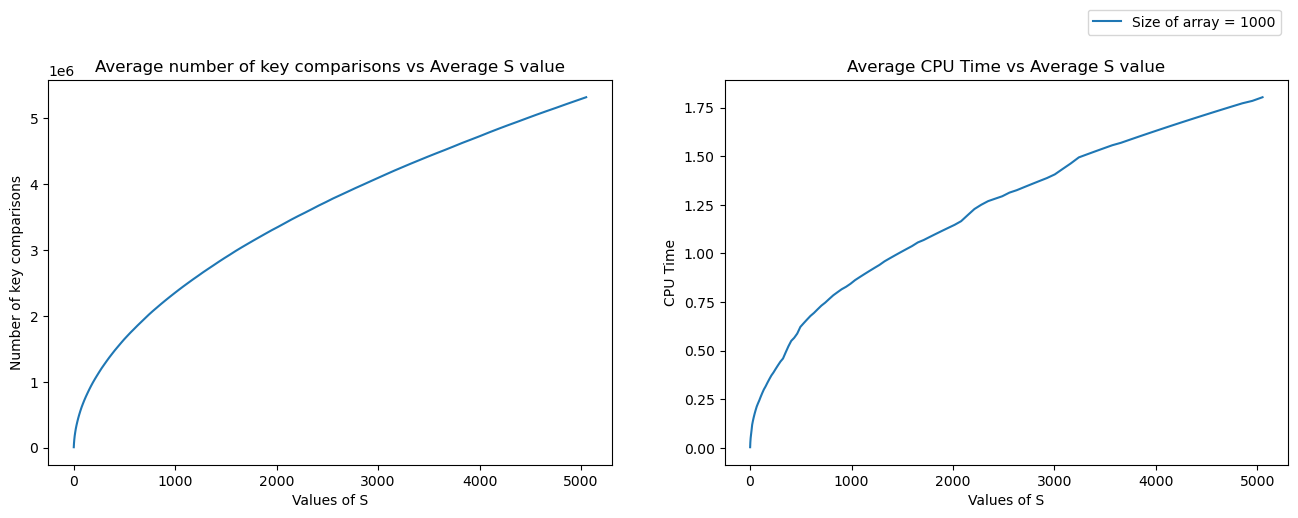

In [9]:
# Fixed n = 1 million
total_comparison = []
avg_comparison = []
total_time = []
avg_time = []
threshold = []
avg_threshold = []

# Varies S starting from 1 to 100 in step of 1
# If put 100, 100 is excluded. So to include 100, we use 101 instead
for s in range(1, 101, 1):
    # Generate the dataset and run 5 times
    arr = randgen(1, 1000, 1000)
    for i in range(5):
        # Start the timer
        cpu_start = process_time()
        count = MergeInsertSort(arr, 0, len(arr)-1, s)
        # Stop the timer
        cpu_stop = process_time()
        # Find the time elasped
        cpu_diff = cpu_stop - cpu_start
        total_comparison.append(count)
        # Keep track of the CPU time
        total_time.append(cpu_diff)
        # Keep track of the S values
        threshold.append(s)
    
    # Calculate the average CPU time and key comparison
    time = sum(total_time) / 5
    key = sum(total_comparison) / 5
    avg_comparison.append(key)
    avg_time.append(time)
    value = sum(threshold) / 5
    avg_threshold.append(value)

fixed_n = pd.DataFrame({"Average S" : avg_threshold})
fixed_n['Average Key comparison'] = pd.Series(avg_comparison)
fixed_n['Average CPU Time'] = pd.Series(avg_time)

x1 = fixed_n['Average S']
y1 = fixed_n['Average Key comparison']

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].plot(x1, y1)
axes[0].set_title('Average number of key comparisons vs Average S value')
axes[0].set_xlabel('Values of S')
axes[0].set_ylabel('Number of key comparisons')


x2 = fixed_n['Average S']
y2 = fixed_n['Average CPU Time']

axes[1].plot(x2, y2)
axes[1].set_title('Average CPU Time vs Average S value')
axes[1].set_xlabel('Values of S')
axes[1].set_ylabel('CPU Time')
plt.legend(['Size of array = 1000'], bbox_to_anchor = (1, 1.20))

fixed_n

### With different sizes of n, determine the optimal value of S

In [ ]:
# n ranges from 1000 to 10 million
# S range from 1 to 100
total_comparison = []
total_time = []
size = []
threshold = []
avg_time =[]
avg_comparison = []
avg_s = []

for n in range(1000, 10000, 500):
    for s in range(1, 100):
        arr = randgen(1, 1000, n)
        for k in range(5):
            # Start the timer
            cpu_start = process_time()
            count = MergeInsertSort(arr, 0, len(arr)-1, s)
            # Stop the timer
            cpu_stop = process_time()
            # Find the time elasped
            cpu_diff = cpu_stop - cpu_start
            total_comparison.append(count)
            # Keep track of the CPU time
            total_time.append(cpu_diff)
            # Keep track of the S values
            threshold.append(s)
        
    # Keep track of the array size
    size.append(n)
    # Calculate the average CPU time and key comparison
    time = sum(total_time) / 5
    key = sum(total_comparison) / 5
    avg_comparison.append(key)
    avg_time.append(time)
    value = sum(threshold) / 5
    avg_threshold.append(value)
 
        
optimalS = pd.DataFrame({"n" : size})
optimalS['Average S'] = pd.Series(avg_threshold)
optimalS['Average Key Comparison'] = pd.Series(avg_comparison)
optimalS['Average CPU Time'] = pd.Series(avg_time)

print(optimalS)